<a href="https://colab.research.google.com/github/ArcWaterCash/statistics/blob/main/1_%E6%8E%A2%E7%B4%A2%E7%9A%84%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm *.csv
!wget https://www.dropbox.com/sh/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra?dl=1 -O files.zip
!unzip files.zip

--2021-01-03 18:53:30--  https://www.dropbox.com/sh/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra [following]
--2021-01-03 18:53:30--  https://www.dropbox.com/sh/dl/clb5aiswr7ar0ci/AABBNwTcTNey2ipoSw_kH5gra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc97d412b2f4e96c14a157d93e56.dl.dropboxusercontent.com/zip_download_get/ApvEZ4F1Qtl0vRnir0cuWBzzJkcuym4CKnmebsK8r8-aKeZVQFI6_s1QMTTU90MxTggJq_HFBOS58ETbBBYnti_G1yrhVIKLi4aDMaUK58dsPg?dl=1 [following]
--2021-01-03 18:53:30--  https://uc97d412b2f4e96c14a157d93e56.dl.dropboxusercontent.com/zip_download_get/ApvEZ4F1Qtl0vRnir0cuWBzzJkcuym4CKnmebsK8r8-aKeZVQFI6_s1QMTTU90MxTggJq_HFBOS

# 1.3 位置の推定

In [2]:
# 平均値：外れ値の影響を受けやすい
import pandas as pd
state = pd.read_csv('state.csv')
state['Population'].mean()

6162876.3

In [3]:
# トリム平均：外れ値の影響を受けにくい
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)

4783697.125

In [4]:
# 中央値：外れ値の影響を受けにくい
state['Population'].median()

4436369.5

In [5]:
# 加重平均
import numpy as np
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [6]:
# 加重中央値
!pip install wquantiles
import wquantiles
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

# 1.4 散らばりの推定

In [7]:
# 標準偏差
state['Population'].std()

6848235.347401142

In [8]:
# 四分位数
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [9]:
# 中央偏差
from statsmodels import robust
robust.scale.mad(state['Population'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3849876.1459979336

# 1.5 データ分布の探索

In [10]:
# パーセンタイル
state['Murder.Rate'].quantile([.05, .25, .50, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(million)')

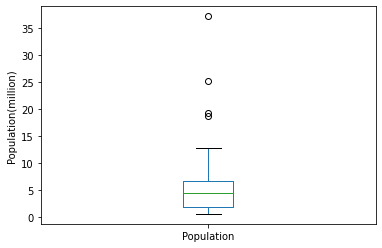

In [11]:
# 箱ひげ図
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(million)')

In [12]:
# 度数分布
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population(million)')

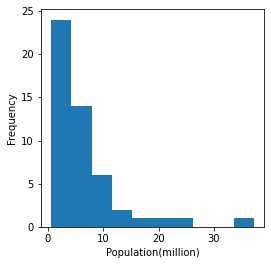

In [13]:
# ヒストグラム
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(million)')

Text(0.5, 0, 'Murder.Rate(per 100,000')

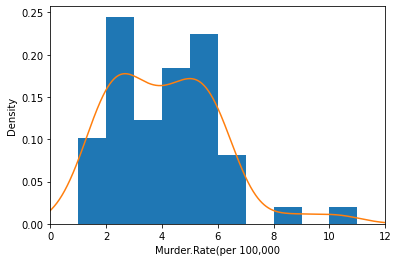

In [14]:
# 密度プロット
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder.Rate(per 100,000')